# Using Machine Learning Tools 2021, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore over-fitting and know what appropriate actions to take in these cases.
 

It is the intention that this assignment will take you through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled data of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (including all models and hyperparameter settings that you consider).  

The clients have asked to be informed about the following:
 - **unbiased accuracy** estimate of a deep learning model (since DL models are fast when deployed)
 - the letter with the lowest individual accuracy
 - the most common error (of one letter being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data, checking it, fixing any problems, and displaying a sample
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best one, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly what networks you have tried, the method you used to optimise them, the associated learning curves, their summary performance and selection process to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - a statistical test between the best and second-best models, to see if there is any significant difference in performance (overall accuracy)
 - it is hoped that the accuracy will exceed 96% overall and better than 90% for every individual letter, and you are asked to:
     - report the overall accuracy
     - report the accuracy for each individual letter
     - write a short recommendation regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps, as you've used in other assignments and workshops.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing, beyond the code, comments and the small amount that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (short summaries often help here), and include a few small markdown cells that describe or summarise things when necessary.

Marks for the assignment will be determined according to the general rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 10%: Loading, investigating, manipulating and displaying data
 - 20%: Initial model successfully trained (and acting as a baseline)
 - 45%: Optimisation of an appropriate set of models in an appropriate way (given the constraint of 50 training runs)
 - 25%: Comparison of models, selection of the best two and reporting of final results

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments. The one exception to this is the statistical test, which will be covered in week 11.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis. 
- Your code must use the current stable versions of python libraries, not outdated versions.
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code, so that its purpose is clear to the reader!
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib and keras, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from the workshops as a base for this assignment but be aware that they will normally not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications.

The assignment is worth 35% of your overall mark for the course.

Mark Jenkinson  
May 2022

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os, time
import pandas as pd

# Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import ReduceLROnPlateau
# from keras.optimizers import RMSprop

# Load the data

See shapes of each data sets.

In [3]:
num_letter = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
}

letter_num = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'K': 9,
    'L': 10,
    'M': 11,
    'N': 12,
    'O': 13,
    'P': 14,
    'Q': 15,
    'R': 16,
    'S': 17,
    'T': 18,
    'U': 19,
    'V': 20,
    'W': 21,
    'X': 22,
    'Y': 23,
}

In [4]:
# load the dataset
train_data = pd.read_csv('/Users/malujie/Machine-learning/A3/sign_mnist_train.csv')
test_data = pd.read_csv('/Users/malujie/Machine-learning/A3/sign_mnist_test.csv')
# print(train_data.describe())
# print(test_data.describe)
# print(train_data.shape)
# print(test_data.shape)

# define train set
X_train = train_data.drop(labels=['label'], axis=1)
Y_train = train_data['label']
# print(X_train.shape)
# print(Y_train.shape)

# define test set
X_test = test_data.drop(labels=['label'], axis=1)
Y_test = test_data['label']
# print(X_test.shape)
# print(Y_test.shape)

In [5]:
X_train = X_train[Y_train != 200]
Y_train = Y_train[Y_train != 200]

In [6]:
# change Y_train value
Y_train1 = []
for i in Y_train:
    Y_train1.append(letter_num.get(num_letter.get(i)))
    
Y_test1 = []
for i in Y_test:
    Y_test1.append(letter_num.get(num_letter.get(i)))
    
Y_train = np.array(Y_train1)
Y_test = np.array(Y_test1)

In [7]:
# reshape the data
X_test = np.array(X_test).reshape(-1, 28, 28)
X_train =  np.array(X_train).reshape(-1, 28, 28)
print(X_test.shape)
print(X_train.shape)

(7172, 28, 28)
(27454, 28, 28)


Use test function to test if there has a problem in datasets.

In [8]:
# new shape of X_train and Y_train
print(X_train.shape)
print(Y_train.shape)

(27454, 28, 28)
(27454,)


Show one example here.

Letter: D


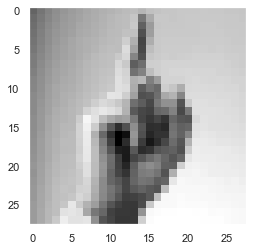

In [9]:
X_train = X_train/255
X_val, Y_val = X_test[:5000]/255, Y_test[:5000]

# print(X_val.dtype)
# print(X_train.dtype)

print("Letter:", num_letter[Y_train[0]])
plt.imshow(X_train[0,:,:], cmap='gray')
plt.grid(False)
plt.show()

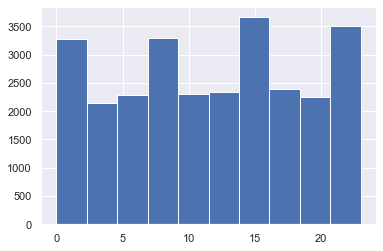

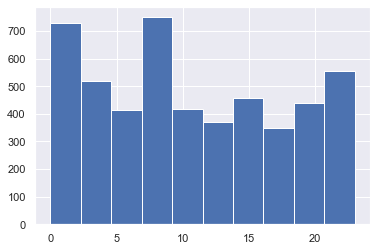

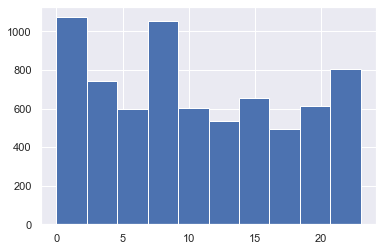

In [10]:
plt.hist(Y_train)
plt.show()
plt.hist(Y_val)
plt.show()
plt.hist(Y_test)
plt.show()

# CNN Models (Base)

In [10]:
# Base
n_train = 27455
n_valid = 5000

hiddensizes = [16, 32, 16]

actfn = "elu"

optimizer = keras.optimizers.SGD
learningrate = 0.01   

batch_size = 32
n_epochs = 50

In [11]:
# define the base model
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate=0):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))    
    model.add(keras.layers.MaxPooling2D(pool_size=2))          
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))  
        model.add(keras.layers.MaxPooling2D(pool_size=2))          
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  
    # fully connected layer
    model.add(keras.layers.Flatten())                          
    model.add(keras.layers.Dense(24, activation = "softmax"))  
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model

In [12]:
# Reshape the data to be shape [Nx, Ny, 1]  (previously 2D was fine, but for CNN we need depth too)
X_train = X_train.reshape((-1, 28, 28, 1))
X_valid = X_val.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [13]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) 

In [14]:
# CNN
def do_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train[:n_train,:,:,:], Y_train[:n_train], epochs=n_epochs, callbacks = callbacks, 
                        validation_data=(X_valid[:n_valid,:,:,:], Y_val[:n_valid]))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

In [40]:
valacc, history, model = do_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

Epoch 1/50
858/858 [==============================] - 9s 10ms/step - loss: 2.8556 - accuracy: 0.1952 - val_loss: 1.9017 - val_accuracy: 0.4628
Epoch 2/50
858/858 [==============================] - 8s 9ms/step - loss: 1.1220 - accuracy: 0.6562 - val_loss: 0.9442 - val_accuracy: 0.6792
Epoch 3/50
858/858 [==============================] - 8s 9ms/step - loss: 0.4861 - accuracy: 0.8468 - val_loss: 0.7290 - val_accuracy: 0.7528
Epoch 4/50
858/858 [==============================] - 8s 9ms/step - loss: 0.2382 - accuracy: 0.9291 - val_loss: 0.5509 - val_accuracy: 0.8454
Epoch 5/50
858/858 [==============================] - 8s 9ms/step - loss: 0.1160 - accuracy: 0.9691 - val_loss: 0.5708 - val_accuracy: 0.8388
Epoch 6/50
858/858 [==============================] - 8s 9ms/step - loss: 0.0607 - accuracy: 0.9885 - val_loss: 0.4915 - val_accuracy: 0.8714
Epoch 7/50
858/858 [==============================] - 8s 9ms/step - loss: 0.0317 - accuracy: 0.9967 - val_loss: 0.5473 - val_accuracy: 0.8642
Epoch

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 flatten_1 (Flatten)         (None, 784)              

In [23]:
def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
    plt.xlabel('Epochs')
    plt.show() 

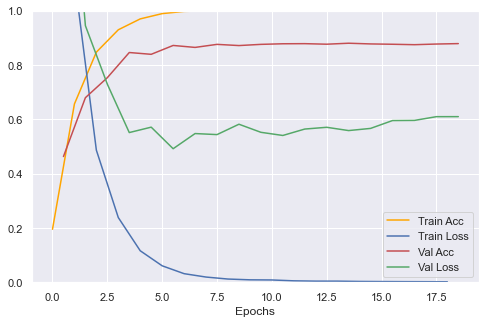

In [43]:
plot_history(history)

## Discovery --> hidden size

We find that the hidden size is not very large, we can make the size larger to increase the accuracy.

In [15]:
# first test
hiddensizes = [32, 64, 32]

In [33]:
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate=0):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))    
    model.add(keras.layers.MaxPooling2D(pool_size=2))          
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))  
        model.add(keras.layers.MaxPooling2D(pool_size=2))          
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  
    # fully connected layer
    model.add(keras.layers.Flatten())                          
    model.add(keras.layers.Dense(24, activation = "softmax"))  
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model

In [34]:
valacc, history, model = do_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

Epoch 1/50
858/858 [==============================] - 19s 21ms/step - loss: 2.7102 - accuracy: 0.2169 - val_loss: 1.7776 - val_accuracy: 0.4504
Epoch 2/50
858/858 [==============================] - 17s 20ms/step - loss: 1.0944 - accuracy: 0.6634 - val_loss: 1.0489 - val_accuracy: 0.6544
Epoch 3/50
858/858 [==============================] - 18s 21ms/step - loss: 0.4937 - accuracy: 0.8448 - val_loss: 0.6851 - val_accuracy: 0.7788
Epoch 4/50
858/858 [==============================] - 19s 22ms/step - loss: 0.2422 - accuracy: 0.9270 - val_loss: 0.5705 - val_accuracy: 0.8146
Epoch 5/50
858/858 [==============================] - 18s 21ms/step - loss: 0.1183 - accuracy: 0.9699 - val_loss: 0.5207 - val_accuracy: 0.8366
Epoch 6/50
858/858 [==============================] - 19s 22ms/step - loss: 0.0605 - accuracy: 0.9891 - val_loss: 0.5389 - val_accuracy: 0.8270
Epoch 7/50
858/858 [==============================] - 17s 20ms/step - loss: 0.0330 - accuracy: 0.9961 - val_loss: 0.4784 - val_accuracy:

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 flatten_2 (Flatten)         (None, 1568)             

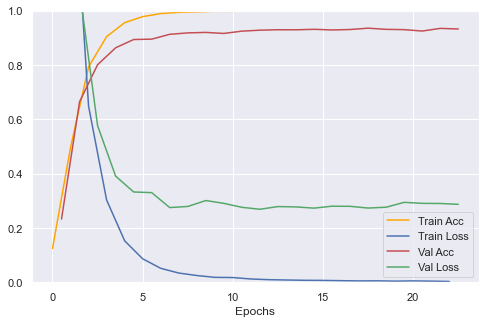

In [22]:
plot_history(history)

***

In [110]:
# second test
hiddensizes = [64, 128, 64]

In [112]:
valacc, history, model = do_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

Epoch 1/50
858/858 [==============================] - 36s 42ms/step - loss: 0.6917 - accuracy: 0.7908 - val_loss: 0.4297 - val_accuracy: 0.8690
Epoch 2/50
858/858 [==============================] - 40s 46ms/step - loss: 0.0088 - accuracy: 0.9992 - val_loss: 0.4338 - val_accuracy: 0.8960
Epoch 3/50
858/858 [==============================] - 39s 46ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4700 - val_accuracy: 0.8984
Epoch 4/50
858/858 [==============================] - 40s 47ms/step - loss: 9.0168e-04 - accuracy: 1.0000 - val_loss: 0.4980 - val_accuracy: 0.9024
Epoch 5/50
858/858 [==============================] - 40s 47ms/step - loss: 5.9558e-04 - accuracy: 1.0000 - val_loss: 0.5100 - val_accuracy: 0.9022
Epoch 6/50
858/858 [==============================] - 41s 48ms/step - loss: 4.4376e-04 - accuracy: 1.0000 - val_loss: 0.5239 - val_accuracy: 0.9034
Epoch 7/50
858/858 [==============================] - 38s 44ms/step - loss: 3.4985e-04 - accuracy: 1.0000 - val_loss: 0.5350

In [113]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 7, 7, 64)          73792     
                                                                 
 flatten_20 (Flatten)        (None, 3136)            

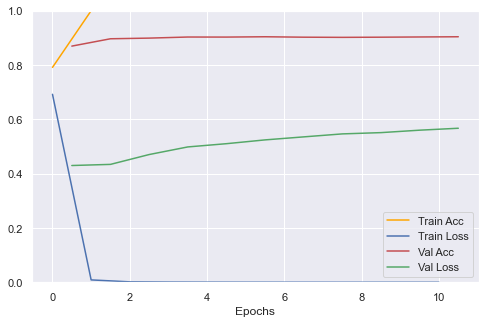

In [114]:
plot_history(history)

***

In [115]:
# third test
hiddensizes = [32, 64, 128]

In [116]:
valacc, history, model = do_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

Epoch 1/50
858/858 [==============================] - 19s 22ms/step - loss: 0.6769 - accuracy: 0.7996 - val_loss: 0.4460 - val_accuracy: 0.8762
Epoch 2/50
858/858 [==============================] - 21s 25ms/step - loss: 0.0106 - accuracy: 0.9986 - val_loss: 0.4775 - val_accuracy: 0.9008
Epoch 3/50
858/858 [==============================] - 21s 25ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.5208 - val_accuracy: 0.9030
Epoch 4/50
858/858 [==============================] - 21s 25ms/step - loss: 9.7107e-04 - accuracy: 1.0000 - val_loss: 0.5450 - val_accuracy: 0.9050
Epoch 5/50
858/858 [==============================] - 21s 25ms/step - loss: 6.4653e-04 - accuracy: 1.0000 - val_loss: 0.5630 - val_accuracy: 0.9046
Epoch 6/50
858/858 [==============================] - 21s 24ms/step - loss: 4.7636e-04 - accuracy: 1.0000 - val_loss: 0.5674 - val_accuracy: 0.9072
Epoch 7/50
858/858 [==============================] - 19s 23ms/step - loss: 3.7346e-04 - accuracy: 1.0000 - val_loss: 0.5808

In [117]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 flatten_21 (Flatten)        (None, 6272)            

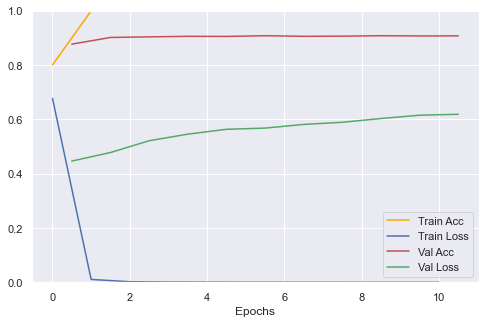

In [118]:
plot_history(history)

We test 3 plans in the hiddensizes:

- Plan 1: hiddensizes --> [32, 64, 32]

- Plan 2: hiddensizes --> [64, 128, 64]

- Plan 3: hiddensizes --> [32, 64, 128]


Trough the output, we can see that plan 3 works best.

## Discovery --> add dropout layer

Through searching the information, I notice that add a dropout layer can reduces overfitting.

By the way, I change the structure of the CNN model.

In [16]:
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate=0):
    model = keras.models.Sequential()
    # layer 1
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))    
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    
    # layer 2                  
    model.add(keras.layers.Conv2D(filters=hiddensizes[1], kernel_size=3, strides=1, padding="same", activation=actfn))
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))
    
    # layer 3
    model.add(keras.layers.Conv2D(filters=hiddensizes[2], kernel_size=3, strides=1, padding="same", activation=actfn))
    model.add(keras.layers.MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))
    
    # fully connected layers
    model.add(Flatten())
    model.add(Dropout(0.5))                 
    model.add(Dense(24, activation = "softmax"))  
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model

In [51]:
valacc, history, model = do_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

Epoch 1/50
858/858 [==============================] - 18s 20ms/step - loss: 3.1396 - accuracy: 0.0826 - val_loss: 3.0808 - val_accuracy: 0.1186
Epoch 2/50
858/858 [==============================] - 16s 19ms/step - loss: 2.5440 - accuracy: 0.2688 - val_loss: 1.9561 - val_accuracy: 0.4494
Epoch 3/50
858/858 [==============================] - 16s 18ms/step - loss: 1.4128 - accuracy: 0.5699 - val_loss: 1.1048 - val_accuracy: 0.6434
Epoch 4/50
858/858 [==============================] - 17s 20ms/step - loss: 0.7661 - accuracy: 0.7547 - val_loss: 0.7484 - val_accuracy: 0.7404
Epoch 5/50
858/858 [==============================] - 16s 19ms/step - loss: 0.4648 - accuracy: 0.8522 - val_loss: 0.5191 - val_accuracy: 0.8334
Epoch 6/50
858/858 [==============================] - 21s 24ms/step - loss: 0.3031 - accuracy: 0.9038 - val_loss: 0.4229 - val_accuracy: 0.8568
Epoch 7/50
858/858 [==============================] - 19s 22ms/step - loss: 0.2238 - accuracy: 0.9292 - val_loss: 0.3193 - val_accuracy:

In [52]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 3, 3, 32)        

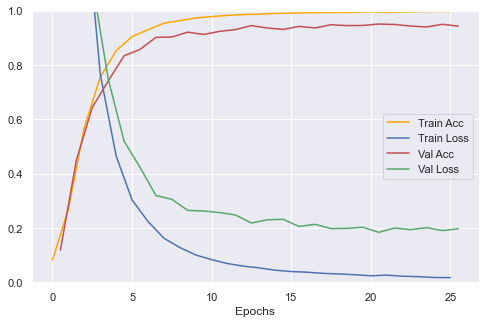

In [53]:
plot_history(history)

## Explore learning rate

Epoch 1/50
858/858 [==============================] - 20s 22ms/step - loss: nan - accuracy: 0.0409 - val_loss: nan - val_accuracy: 0.0428
Epoch 2/50
858/858 [==============================] - 18s 21ms/step - loss: nan - accuracy: 0.0410 - val_loss: nan - val_accuracy: 0.0428
Epoch 3/50
858/858 [==============================] - 17s 20ms/step - loss: nan - accuracy: 0.0410 - val_loss: nan - val_accuracy: 0.0428
Epoch 4/50
858/858 [==============================] - 16s 19ms/step - loss: nan - accuracy: 0.0410 - val_loss: nan - val_accuracy: 0.0428
Epoch 5/50
858/858 [==============================] - 16s 18ms/step - loss: nan - accuracy: 0.0410 - val_loss: nan - val_accuracy: 0.0428
Epoch 6/50
858/858 [==============================] - 17s 20ms/step - loss: nan - accuracy: 0.0410 - val_loss: nan - val_accuracy: 0.0428
Network configuration = [32, 64, 32]


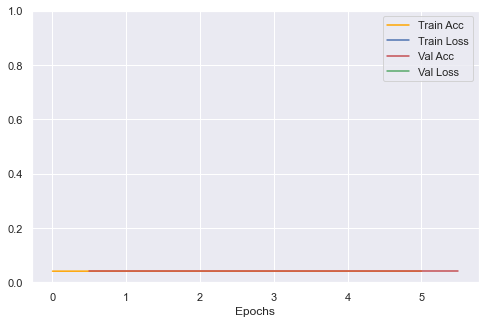

Epoch 1/50
858/858 [==============================] - 17s 19ms/step - loss: 1.0759 - accuracy: 0.6766 - val_loss: 0.2795 - val_accuracy: 0.9118
Epoch 2/50
858/858 [==============================] - 17s 20ms/step - loss: 0.0709 - accuracy: 0.9791 - val_loss: 0.2022 - val_accuracy: 0.9472
Epoch 3/50
858/858 [==============================] - 17s 20ms/step - loss: 0.0282 - accuracy: 0.9927 - val_loss: 0.2077 - val_accuracy: 0.9492
Epoch 4/50
858/858 [==============================] - 17s 20ms/step - loss: 0.0152 - accuracy: 0.9962 - val_loss: 0.2669 - val_accuracy: 0.9496
Epoch 5/50
858/858 [==============================] - 17s 20ms/step - loss: 0.0129 - accuracy: 0.9968 - val_loss: 0.2169 - val_accuracy: 0.9554
Epoch 6/50
858/858 [==============================] - 18s 20ms/step - loss: 0.0085 - accuracy: 0.9979 - val_loss: 0.2233 - val_accuracy: 0.9526
Epoch 7/50
858/858 [==============================] - 18s 21ms/step - loss: 0.0060 - accuracy: 0.9987 - val_loss: 0.2806 - val_accuracy:

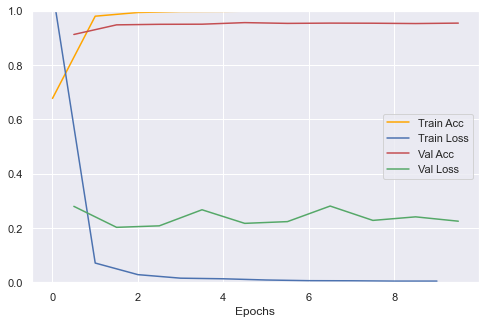

Epoch 1/50
858/858 [==============================] - 18s 20ms/step - loss: 3.1344 - accuracy: 0.0952 - val_loss: 3.0779 - val_accuracy: 0.1600
Epoch 2/50
858/858 [==============================] - 17s 20ms/step - loss: 2.5746 - accuracy: 0.2664 - val_loss: 1.9329 - val_accuracy: 0.4378
Epoch 3/50
858/858 [==============================] - 17s 20ms/step - loss: 1.3512 - accuracy: 0.5951 - val_loss: 1.0691 - val_accuracy: 0.6750
Epoch 4/50
858/858 [==============================] - 19s 22ms/step - loss: 0.6956 - accuracy: 0.7860 - val_loss: 0.6486 - val_accuracy: 0.7928
Epoch 5/50
858/858 [==============================] - 17s 20ms/step - loss: 0.4057 - accuracy: 0.8738 - val_loss: 0.4406 - val_accuracy: 0.8648
Epoch 6/50
858/858 [==============================] - 19s 22ms/step - loss: 0.2602 - accuracy: 0.9216 - val_loss: 0.3328 - val_accuracy: 0.8988
Epoch 7/50
858/858 [==============================] - 17s 20ms/step - loss: 0.1798 - accuracy: 0.9481 - val_loss: 0.3042 - val_accuracy:

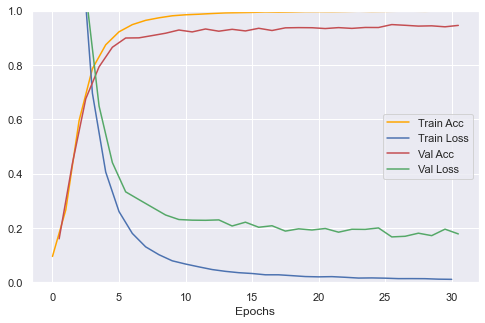

Epoch 1/50
858/858 [==============================] - 18s 21ms/step - loss: 3.1783 - accuracy: 0.0478 - val_loss: 3.1827 - val_accuracy: 0.0442
Epoch 2/50
858/858 [==============================] - 17s 20ms/step - loss: 3.1637 - accuracy: 0.0541 - val_loss: 3.1774 - val_accuracy: 0.0360
Epoch 3/50
858/858 [==============================] - 17s 20ms/step - loss: 3.1545 - accuracy: 0.0678 - val_loss: 3.1720 - val_accuracy: 0.0506
Epoch 4/50
858/858 [==============================] - 17s 20ms/step - loss: 3.1451 - accuracy: 0.0850 - val_loss: 3.1595 - val_accuracy: 0.0818
Epoch 5/50
858/858 [==============================] - 17s 20ms/step - loss: 3.1336 - accuracy: 0.1034 - val_loss: 3.1514 - val_accuracy: 0.1076
Epoch 6/50
858/858 [==============================] - 18s 21ms/step - loss: 3.1187 - accuracy: 0.1206 - val_loss: 3.1343 - val_accuracy: 0.1188
Epoch 7/50
858/858 [==============================] - 17s 20ms/step - loss: 3.1004 - accuracy: 0.1316 - val_loss: 3.1113 - val_accuracy:

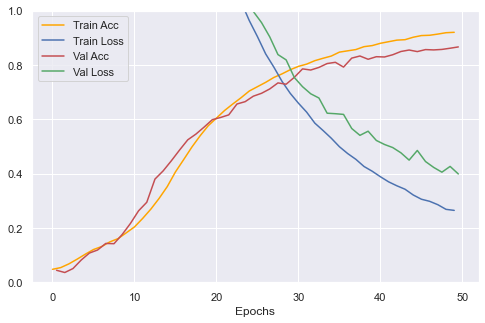

Epoch 1/50
858/858 [==============================] - 18s 21ms/step - loss: 3.2043 - accuracy: 0.0381 - val_loss: 3.1885 - val_accuracy: 0.0462
Epoch 2/50
858/858 [==============================] - 18s 21ms/step - loss: 3.1923 - accuracy: 0.0380 - val_loss: 3.1834 - val_accuracy: 0.0428
Epoch 3/50
858/858 [==============================] - 18s 21ms/step - loss: 3.1835 - accuracy: 0.0393 - val_loss: 3.1811 - val_accuracy: 0.0392
Epoch 4/50
858/858 [==============================] - 17s 20ms/step - loss: 3.1800 - accuracy: 0.0404 - val_loss: 3.1800 - val_accuracy: 0.0224
Epoch 5/50
858/858 [==============================] - 18s 21ms/step - loss: 3.1771 - accuracy: 0.0441 - val_loss: 3.1795 - val_accuracy: 0.0284
Epoch 6/50
858/858 [==============================] - 18s 21ms/step - loss: 3.1752 - accuracy: 0.0465 - val_loss: 3.1792 - val_accuracy: 0.0236
Network configuration = [32, 64, 32]


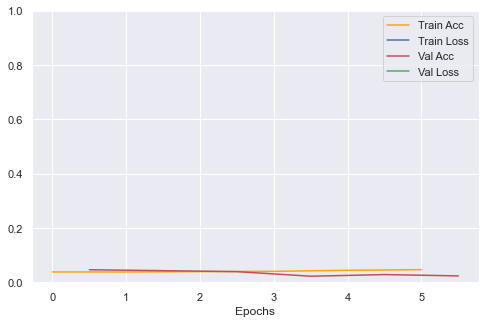

[[1, 0.04280000180006027], [0.1, 0.9553999900817871], [0.01, 0.948199987411499], [0.001, 0.8659999966621399], [0.0001, 0.04619999974966049]]


In [58]:
# Learning rate
res=[]
for learningrate in [1, 0.1, 0.01, 0.001, 0.0001]:
    valacc, history, discard = do_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
    print(f'Network configuration = {hiddensizes}')
    plot_history(history)
    res += [[learningrate,valacc]]
print(res)

Text(0, 0.5, 'Val Accuracy')

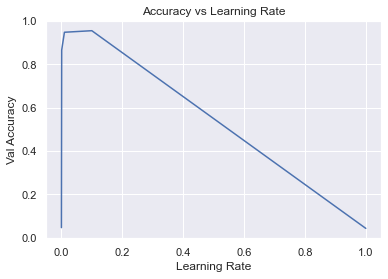

In [59]:
res=np.array(res)
plt.plot(res[:,0],res[:,1])
plt.title('Accuracy vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Val Accuracy')

we notice that the accuracy get the highest when learning rate = 0.1.

## Explore active function

Epoch 1/50
858/858 [==============================] - 18s 21ms/step - loss: 1.0778 - accuracy: 0.6699 - val_loss: 0.3821 - val_accuracy: 0.8698
Epoch 2/50
858/858 [==============================] - 16s 19ms/step - loss: 0.0715 - accuracy: 0.9795 - val_loss: 0.1948 - val_accuracy: 0.9396
Epoch 3/50
858/858 [==============================] - 16s 19ms/step - loss: 0.0262 - accuracy: 0.9931 - val_loss: 0.2135 - val_accuracy: 0.9378
Epoch 4/50
858/858 [==============================] - 16s 19ms/step - loss: 0.0155 - accuracy: 0.9966 - val_loss: 0.1859 - val_accuracy: 0.9416
Epoch 5/50
858/858 [==============================] - 16s 19ms/step - loss: 0.0121 - accuracy: 0.9970 - val_loss: 0.2061 - val_accuracy: 0.9436
Epoch 6/50
858/858 [==============================] - 18s 21ms/step - loss: 0.0062 - accuracy: 0.9989 - val_loss: 0.2456 - val_accuracy: 0.9418
Epoch 7/50
858/858 [==============================] - 17s 20ms/step - loss: 0.0064 - accuracy: 0.9985 - val_loss: 0.2099 - val_accuracy:

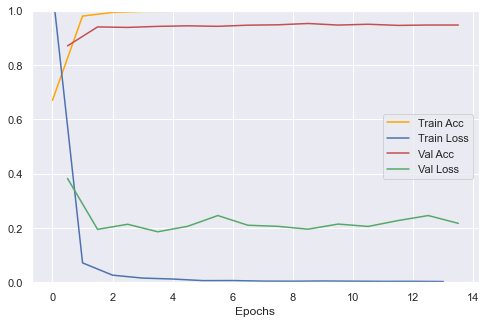

Epoch 1/50
858/858 [==============================] - 15s 17ms/step - loss: 1.8727 - accuracy: 0.4291 - val_loss: 0.7170 - val_accuracy: 0.7380
Epoch 2/50
858/858 [==============================] - 15s 17ms/step - loss: 0.2958 - accuracy: 0.8984 - val_loss: 0.3348 - val_accuracy: 0.8862
Epoch 3/50
858/858 [==============================] - 16s 19ms/step - loss: 0.1071 - accuracy: 0.9643 - val_loss: 0.3574 - val_accuracy: 0.8872
Epoch 4/50
858/858 [==============================] - 17s 19ms/step - loss: 0.0674 - accuracy: 0.9777 - val_loss: 0.1966 - val_accuracy: 0.9376
Epoch 5/50
858/858 [==============================] - 17s 19ms/step - loss: 0.0451 - accuracy: 0.9843 - val_loss: 0.1853 - val_accuracy: 0.9436
Epoch 6/50
858/858 [==============================] - 19s 22ms/step - loss: 0.0309 - accuracy: 0.9898 - val_loss: 0.2213 - val_accuracy: 0.9352
Epoch 7/50
858/858 [==============================] - 17s 19ms/step - loss: 0.0269 - accuracy: 0.9920 - val_loss: 0.2206 - val_accuracy:

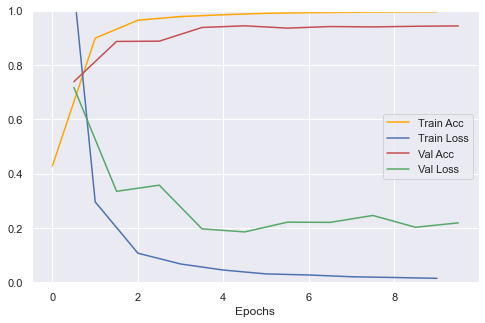

Epoch 1/50
858/858 [==============================] - 19s 21ms/step - loss: 3.1846 - accuracy: 0.0459 - val_loss: 3.1919 - val_accuracy: 0.0364
Epoch 2/50
858/858 [==============================] - 18s 21ms/step - loss: 3.1773 - accuracy: 0.0463 - val_loss: 3.2006 - val_accuracy: 0.0218
Epoch 3/50
858/858 [==============================] - 18s 21ms/step - loss: 3.1767 - accuracy: 0.0454 - val_loss: 3.2025 - val_accuracy: 0.0218
Epoch 4/50
858/858 [==============================] - 18s 21ms/step - loss: 3.1769 - accuracy: 0.0441 - val_loss: 3.2052 - val_accuracy: 0.0220
Epoch 5/50
858/858 [==============================] - 18s 21ms/step - loss: 3.1766 - accuracy: 0.0472 - val_loss: 3.2012 - val_accuracy: 0.0220
Epoch 6/50
858/858 [==============================] - 17s 20ms/step - loss: 3.1767 - accuracy: 0.0465 - val_loss: 3.2025 - val_accuracy: 0.0220


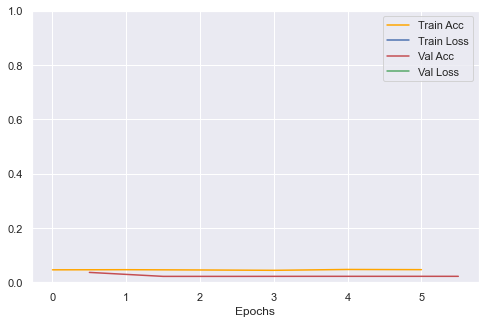

In [45]:
res=[]
for actfn in ['elu', 'relu', 'sigmoid']:
    valacc, history, discard = do_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[valacc]]

We can see that "elu" and "relu" works better.

## Final Stat


In [128]:
# Final
n_train = 27455
n_valid = 5000

hiddensizes = [32, 64, 128]

actfn = "elu"

optimizer = keras.optimizers.SGD
learningrate = 0.1   

batch_size = 32
n_epochs = 50

In [131]:
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate=0):
    model = keras.models.Sequential()
    
    # layer 1
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=(5,5), strides=(1,1), activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))    
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    
    # layer 2                  
    model.add(keras.layers.Conv2D(filters=hiddensizes[1], kernel_size=(3,3), strides=(1,1), padding="same", activation=actfn))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    
    # layer 3
    model.add(keras.layers.Conv2D(filters=hiddensizes[2], kernel_size=(3,3), strides=(1,1), padding="same", activation=actfn))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    
    # fully connected layers
    model.add(Flatten())
    model.add(Dropout(0.5))                 
    model.add(Dense(24, activation = "softmax"))  
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model

In [132]:
valacc, history, model = do_cnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

Epoch 1/50
858/858 [==============================] - 22s 25ms/step - loss: 1.1724 - accuracy: 0.6350 - val_loss: 0.2628 - val_accuracy: 0.9184
Epoch 2/50
858/858 [==============================] - 22s 25ms/step - loss: 0.1457 - accuracy: 0.9507 - val_loss: 0.1688 - val_accuracy: 0.9532
Epoch 3/50
858/858 [==============================] - 21s 25ms/step - loss: 0.0686 - accuracy: 0.9774 - val_loss: 0.1387 - val_accuracy: 0.9588
Epoch 4/50
858/858 [==============================] - 23s 27ms/step - loss: 0.0465 - accuracy: 0.9846 - val_loss: 0.1148 - val_accuracy: 0.9584
Epoch 5/50
858/858 [==============================] - 22s 25ms/step - loss: 0.0297 - accuracy: 0.9894 - val_loss: 0.0989 - val_accuracy: 0.9666
Epoch 6/50
858/858 [==============================] - 23s 27ms/step - loss: 0.0259 - accuracy: 0.9906 - val_loss: 0.1214 - val_accuracy: 0.9654
Epoch 7/50
858/858 [==============================] - 22s 26ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.1121 - val_accuracy:

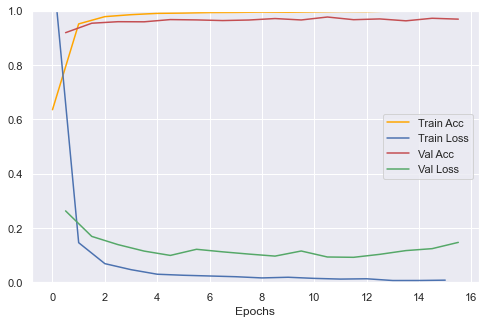

In [133]:
plot_history(history)

In [134]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 dropout_38 (Dropout)        (None, 7, 7, 64)          0         
                                                                 
 conv2d_78 (Conv2D)          (None, 7, 7, 128)       

225/225 [==============================] - 1s 5ms/step


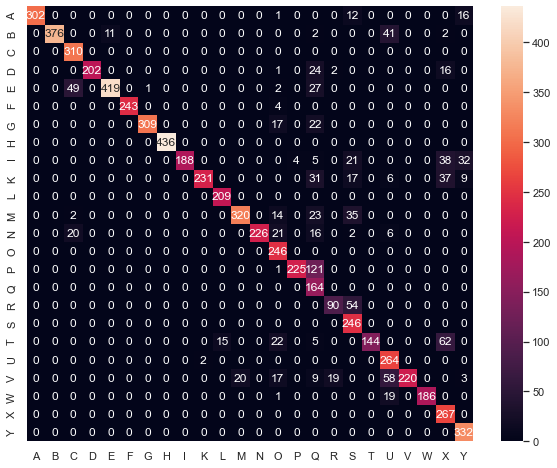

In [135]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)

confusion_mtx = confusion_matrix(Y_test, Y_pred_classes) 
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot()
sns.heatmap(confusion_mtx, annot=True, fmt="d");
labels=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);

In [136]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true = Y_test, y_pred = Y_pred_classes)
print(f'Accuracy is {acc}')

Accuracy is 0.8581985499163414


**Recommandation:**

I notice that my validation accuracy can reach almost 97%, however, my test accuracy only reach 85.8%.

I think it might means the model is overfitting.

So, I think we should focus on how to solve this problem, maybe combine the dense and Convolutional Neural Network together to see if it may improve the accuracy.

# DNN

## Base

In [11]:
# Base
n_train = 27455
n_valid = 5000

hiddensizes = [16, 32, 16]

actfn = "elu"

optimizer = keras.optimizers.SGD
learningrate = 0.01   

batch_size = 32
n_epochs = 50

In [12]:
def model_dense_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [28, 28, 1]))    # always have same sized inputs
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation = actfn))
    model.add(keras.layers.Dense(24, activation = "softmax"))   # always have 10 classes
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [13]:
def do_dnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size, further_callbacks=[]):
    if further_callbacks != []:
        callbacks = further_callbacks
    else:
        callbacks = [early_stopping_cb]
    model = model_dense_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train[:n_train,:,:,:], Y_train[:n_train], epochs=n_epochs, callbacks = callbacks, 
                        validation_data=(X_valid[:n_valid,:,:,:], Y_val[:n_valid]))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

In [14]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) 

In [141]:
valacc, history, model = do_dnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

Epoch 1/50
858/858 [==============================] - 1s 1ms/step - loss: 2.9493 - accuracy: 0.1451 - val_loss: 2.6564 - val_accuracy: 0.1930
Epoch 2/50
858/858 [==============================] - 1s 1ms/step - loss: 2.3097 - accuracy: 0.3023 - val_loss: 1.9900 - val_accuracy: 0.3696
Epoch 3/50
858/858 [==============================] - 1s 1ms/step - loss: 1.7752 - accuracy: 0.4287 - val_loss: 1.7042 - val_accuracy: 0.4594
Epoch 4/50
858/858 [==============================] - 1s 1ms/step - loss: 1.4593 - accuracy: 0.5203 - val_loss: 1.4992 - val_accuracy: 0.5256
Epoch 5/50
858/858 [==============================] - 1s 1ms/step - loss: 1.2453 - accuracy: 0.5877 - val_loss: 1.5095 - val_accuracy: 0.5460
Epoch 6/50
858/858 [==============================] - 1s 1ms/step - loss: 1.1105 - accuracy: 0.6369 - val_loss: 1.3924 - val_accuracy: 0.5776
Epoch 7/50
858/858 [==============================] - 1s 2ms/step - loss: 0.9817 - accuracy: 0.6752 - val_loss: 1.5202 - val_accuracy: 0.5306
Epoch 

In [142]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 16)                12560     
                                                                 
 dense_26 (Dense)            (None, 32)                544       
                                                                 
 dense_27 (Dense)            (None, 16)                528       
                                                                 
 dense_28 (Dense)            (None, 24)                408       
                                                                 
Total params: 14,040
Trainable params: 14,040
Non-trainable params: 0
_________________________________________________________________


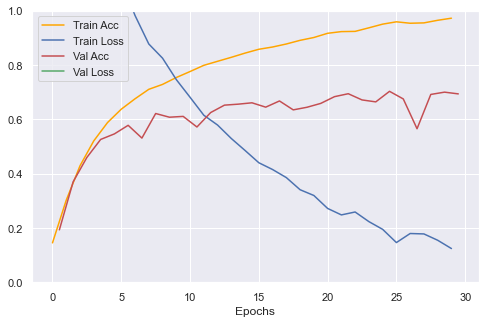

In [143]:
plot_history(history)

## Discovery --> Dropout

In [24]:
def model_dense_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [28, 28, 1]))    # always have same sized inputs
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation = actfn))
        model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(24, activation = "softmax"))   # always have 10 classes
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [25]:
valacc, history, model = do_dnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [233]:
model.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 28, 28, 16)        32        
                                                                 
 dropout_50 (Dropout)        (None, 28, 28, 16)        0         
                                                                 
 dense_133 (Dense)           (None, 28, 28, 32)        544       
                                                                 
 dropout_51 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 dense_134 (Dense)           (None, 28, 28, 16)        528       
                                                                 
 dropout_52 (Dropout)        (None, 28, 28, 16)        0         
                                                                 
 flatten_50 (Flatten)        (None, 12544)           

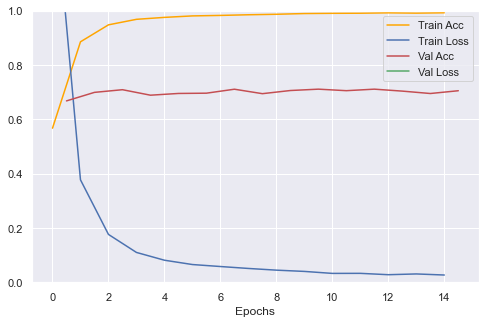

In [234]:
plot_history(history)

***

## Discovery --> hiddensizes

In [20]:
hiddensizes = [32, 64, 32]

In [22]:
valacc, history, model = do_dnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [244]:
model.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 28, 28, 32)        64        
                                                                 
 dropout_53 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 dense_139 (Dense)           (None, 28, 28, 64)        2112      
                                                                 
 dropout_54 (Dropout)        (None, 28, 28, 64)        0         
                                                                 
 dense_140 (Dense)           (None, 28, 28, 32)        2080      
                                                                 
 dropout_55 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 flatten_51 (Flatten)        (None, 25088)           

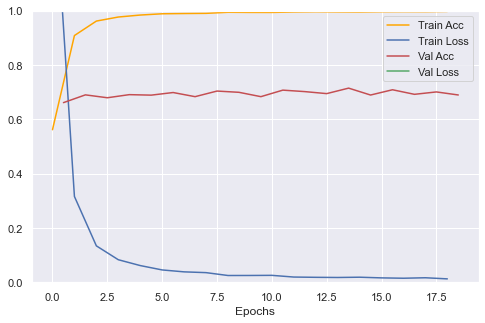

In [245]:
plot_history(history)

***

In [16]:
hiddensizes = [64, 128, 64]

In [17]:
valacc, history, model = do_dnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [18]:
model.summary()

NameError: name 'model' is not defined

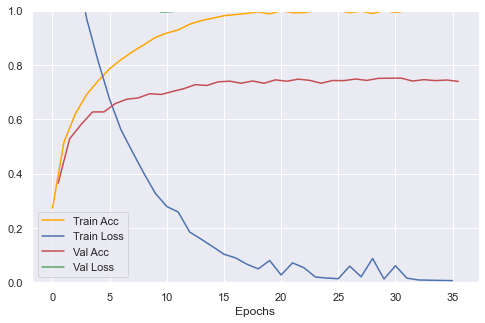

In [ ]:
plot_history(history)

***

In [ ]:
hiddensizes = [32, 64, 128]

In [ ]:
valacc, history, model = do_dnn(hiddensizes, actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)

Epoch 1/50
858/858 [==============================] - 2s 2ms/step - loss: 2.7523 - accuracy: 0.2000 - val_loss: 2.2101 - val_accuracy: 0.3394
Epoch 2/50
858/858 [==============================] - 1s 1ms/step - loss: 1.7859 - accuracy: 0.4527 - val_loss: 1.7069 - val_accuracy: 0.4680
Epoch 3/50
858/858 [==============================] - 1s 2ms/step - loss: 1.3535 - accuracy: 0.5731 - val_loss: 1.3733 - val_accuracy: 0.5684
Epoch 4/50
858/858 [==============================] - 2s 2ms/step - loss: 1.0904 - accuracy: 0.6524 - val_loss: 1.5769 - val_accuracy: 0.5388
Epoch 5/50
858/858 [==============================] - 1s 2ms/step - loss: 0.9176 - accuracy: 0.7039 - val_loss: 1.4604 - val_accuracy: 0.5380
Epoch 6/50
858/858 [==============================] - 1s 2ms/step - loss: 0.7773 - accuracy: 0.7443 - val_loss: 1.2000 - val_accuracy: 0.6416
Epoch 7/50
858/858 [==============================] - 2s 2ms/step - loss: 0.6675 - accuracy: 0.7809 - val_loss: 1.1818 - val_accuracy: 0.6430
Epoch 

In [ ]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_43 (Flatten)        (None, 784)               0         
                                                                 
 dense_104 (Dense)           (None, 32)                25120     
                                                                 
 dense_105 (Dense)           (None, 64)                2112      
                                                                 
 dense_106 (Dense)           (None, 128)               8320      
                                                                 
 dense_107 (Dense)           (None, 24)                3096      
                                                                 
Total params: 38,648
Trainable params: 38,648
Non-trainable params: 0
_________________________________________________________________


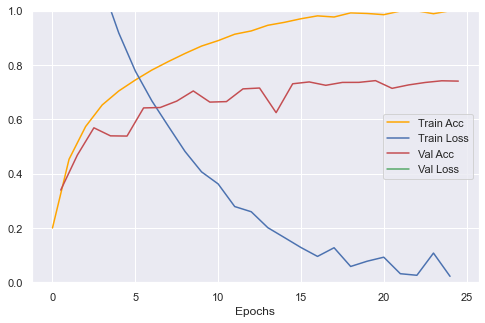

In [ ]:
plot_history(history)

We test 3 plans in the hiddensizes:

- Plan 1: hiddensizes --> [32, 64, 32]

- Plan 2: hiddensizes --> [64, 128, 64]

- Plan 3: hiddensizes --> [32, 64, 128]


Trough the output, it seems three plans works similar.

***

## Explore the learning rate

Epoch 1/50
858/858 [==============================] - 2s 2ms/step - loss: 2.6778 - accuracy: 0.2399 - val_loss: 2.0620 - val_accuracy: 0.4028
Epoch 2/50
858/858 [==============================] - 1s 1ms/step - loss: 1.6910 - accuracy: 0.4733 - val_loss: 1.6456 - val_accuracy: 0.4708
Epoch 3/50
858/858 [==============================] - 1s 1ms/step - loss: 1.3123 - accuracy: 0.5742 - val_loss: 1.3782 - val_accuracy: 0.5638
Epoch 4/50
858/858 [==============================] - 1s 1ms/step - loss: 1.0868 - accuracy: 0.6442 - val_loss: 1.2374 - val_accuracy: 0.6118
Epoch 5/50
858/858 [==============================] - 1s 1ms/step - loss: 0.9071 - accuracy: 0.7085 - val_loss: 1.2167 - val_accuracy: 0.6234
Epoch 6/50
858/858 [==============================] - 1s 1ms/step - loss: 0.7683 - accuracy: 0.7501 - val_loss: 1.2543 - val_accuracy: 0.6160
Epoch 7/50
858/858 [==============================] - 1s 1ms/step - loss: 0.6535 - accuracy: 0.7908 - val_loss: 1.0980 - val_accuracy: 0.6614
Epoch 

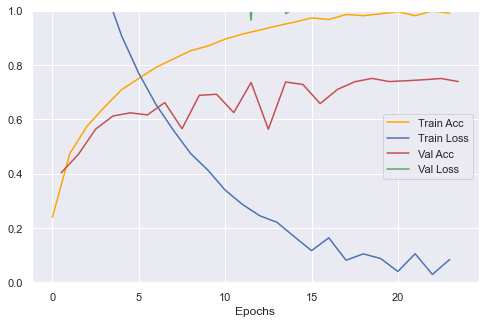

Epoch 1/50
858/858 [==============================] - 2s 1ms/step - loss: 2.6315 - accuracy: 0.2360 - val_loss: 2.1175 - val_accuracy: 0.3614
Epoch 2/50
858/858 [==============================] - 1s 2ms/step - loss: 1.7508 - accuracy: 0.4643 - val_loss: 1.6181 - val_accuracy: 0.4972
Epoch 3/50
858/858 [==============================] - 1s 1ms/step - loss: 1.3432 - accuracy: 0.5720 - val_loss: 1.4086 - val_accuracy: 0.5372
Epoch 4/50
858/858 [==============================] - 1s 1ms/step - loss: 1.0721 - accuracy: 0.6525 - val_loss: 1.4160 - val_accuracy: 0.5574
Epoch 5/50
858/858 [==============================] - 1s 1ms/step - loss: 0.9019 - accuracy: 0.7029 - val_loss: 1.1758 - val_accuracy: 0.6256
Epoch 6/50
858/858 [==============================] - 1s 1ms/step - loss: 0.7468 - accuracy: 0.7567 - val_loss: 1.3397 - val_accuracy: 0.5858
Epoch 7/50
858/858 [==============================] - 1s 1ms/step - loss: 0.6421 - accuracy: 0.7955 - val_loss: 1.3914 - val_accuracy: 0.5802
Epoch 

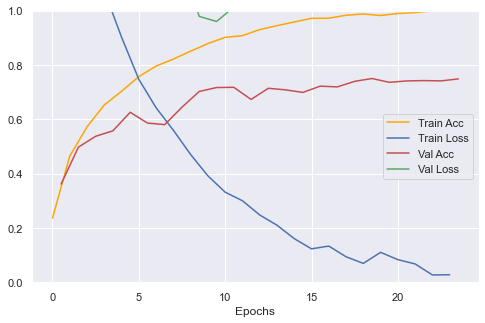

Epoch 1/50
858/858 [==============================] - 2s 1ms/step - loss: 2.7276 - accuracy: 0.2377 - val_loss: 2.3598 - val_accuracy: 0.3342
Epoch 2/50
858/858 [==============================] - 1s 1ms/step - loss: 1.9860 - accuracy: 0.4578 - val_loss: 1.8691 - val_accuracy: 0.5012
Epoch 3/50
858/858 [==============================] - 1s 1ms/step - loss: 1.5715 - accuracy: 0.5642 - val_loss: 1.6174 - val_accuracy: 0.5158
Epoch 4/50
858/858 [==============================] - 1s 1ms/step - loss: 1.3259 - accuracy: 0.6284 - val_loss: 1.4580 - val_accuracy: 0.5756
Epoch 5/50
858/858 [==============================] - 1s 1ms/step - loss: 1.1551 - accuracy: 0.6773 - val_loss: 1.3986 - val_accuracy: 0.5780
Epoch 6/50
858/858 [==============================] - 1s 1ms/step - loss: 1.0298 - accuracy: 0.7132 - val_loss: 1.2652 - val_accuracy: 0.5944
Epoch 7/50
858/858 [==============================] - 1s 1ms/step - loss: 0.9278 - accuracy: 0.7439 - val_loss: 1.2184 - val_accuracy: 0.6294
Epoch 

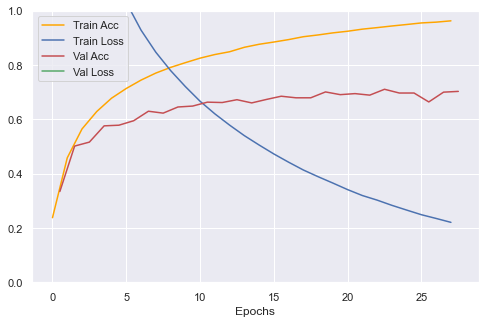

[[100, 0.7501999735832214], [10, 0.7498000264167786], [1, 0.7102000117301941]]


In [226]:
# Number of layers
res=[]
for n in [100, 10, 1]:
    valacc, history, discard = do_dnn(hiddensizes[:n], actfn, optimizer, learningrate, n_train, n_valid, n_epochs, batch_size)
    print(f'Learning rate = {learningrate}')
    plot_history(history)
    res += [[n,valacc]]
print(res)

Text(0, 0.5, 'Val Accuracy')

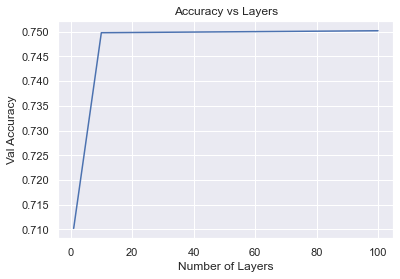

In [227]:
res=np.array(res)
plt.plot(res[:,0],res[:,1])
plt.title('Accuracy vs Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Val Accuracy')

***

## Explore the optimizers & learning rate

In [ ]:
res=[]
for optimizer,lr in [[keras.optimizers.SGD,0.01], [???,???],  . . .  ]:
    valacc, history, discard = do_all(hiddensizes, actfn, optimizer, lr, n_train, n_valid, n_epochs, batch_size)
    plot_history(history)
    res += [[valacc]]

## Final Stat

225/225 [==============================] - 1s 3ms/step


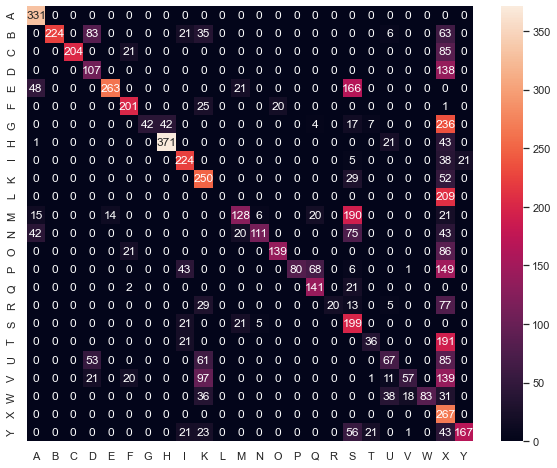

In [191]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1)

confusion_mtx = confusion_matrix(Y_test, Y_pred_classes) 
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot()
sns.heatmap(confusion_mtx, annot=True, fmt="d");
labels=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);

In [192]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true = Y_test, y_pred = Y_pred_classes)
print(f'Accuracy is {acc}')

Accuracy is 0.5175683212493029
